In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [73]:
class Model(nn.Module):     #Setting up the model using OOP we can put in Layers, Weight/Biases, Regularization
    def __init__(self, input_data=4, hd1=10, hd2=10, hd3=10, output=3):     #Initializing Layers
        super().__init__()                          #Call methods from a parent class(Inheritance)
        self.fc1 = nn.Linear(input_data, hd1)       #Linear function means to fully connected the input_data to hd1
        self.fc2 = nn.Linear(hd1, hd2)              #Linear function means to fully connected the hd1 to hd2
        self.fc3 = nn.Linear(hd2, hd3)              #etc
        self.fc4 = nn.Linear(hd3, output)           #The weighted sum of inputs and adding the bias happens here
    def forward(self, x):                   #This is how the neural network moves forward(Forward Pass)
        x = F.relu(self.fc1(x))             #After the output(of hd1) they apply an Activation Function(Relu)
        x = F.relu(self.fc2(x))             #The activation function is applied to the output of the layer
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [74]:
torch.manual_seed(0)    #Set a value and ensures that the randomness is the same
model = Model()         #'Turning on' the Model

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
col_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width','Type of Flower'] # Didn't have Columns
iris_df = pd.read_csv(r"/Users/thewang/Downloads/iris_dataset.csv", names=col_names, header=None )  #Loading Data
iris_df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type of Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [77]:
iris_df['Type of Flower'].unique()      #Looking into the Type of Unique Flower in the column

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [79]:
iris_df['Type of Flower'] = iris_df['Type of Flower'].replace({
    'Iris-setosa': 0.0, 
    'Iris-versicolor': 1.0, 
    'Iris-virginica': 2.0
})                          #Converted the Flowers to int/Floats for the Model to understand better
pd.set_option('future.no_silent_downcasting', True)
iris_df['Type of Flower'] = pd.to_numeric(iris_df['Type of Flower'], errors='coerce')
iris_df['Type of Flower'].unique()              #Making sure it worked

array([0., 1., 2.])

In [80]:
# We have different layers to the model, so we separate the description of the flower from the type of flower
X = iris_df.drop('Type of Flower', axis=1)  # how we have our inputs
y = iris_df['Type of Flower']         #This is the results

In [81]:
#Converted the tabular data into Numpy Array bc pandas df doesn't work directly with tensors 
#X = X.values
#y = y.values
# I can skip this step and put .values, so it knows to use the values of the df 

In [82]:
from sklearn.model_selection import train_test_split # This is to randomly split the data to training and testing
#Test size is % data used for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now converting it to Tensor and put .values in the () if it is not numpy form
X_train = torch.FloatTensor(X_train.values)  #It is easier to put them into floats bc the dataset they were floats
X_test = torch.FloatTensor(X_test.values)

In [83]:
y_train = torch.LongTensor(y_train.values)     #Converting them into Intergers 
y_test = torch.LongTensor(y_test.values)

In [84]:
#Setting up the Criterion, so we can see how far off are the prediction from the true value
criterion = nn.CrossEntropyLoss()
#(Training) Optimizer updates the model to find the minimum of the loss function using Gradient Decent
optimizer = torch.optim.Adam(model.parameters(), lr =.01) #Adam & lr * Grad. vec.= Step size to find minimum error

In [85]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=3, bias=True)
)>

In [86]:
#Training the model 
# Epoch is one run through the neural network with all the training data
epochs = 100
losses = []
#Helps trains the model over epoch amount of time
for epoch in range(epochs):
    y_pred = model.forward(X_train) #Gets Predicted Results
    # Measuring Loss (starts of high)
    loss = criterion(y_pred, y_train)       #1/n * The Sum Notation(y_train-y_pred)^2
    #Keeping track of our losses
    losses.append(loss.item())          #This is 
    # Showing me every 10 epochs(runs)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, Loss: {loss}')
    #Now Back Propagation to help reduce the cost or loss/ Adjusts the weights and biases
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch: 0, Loss: 1.1017285585403442
Epoch: 10, Loss: 1.0612585544586182
Epoch: 20, Loss: 0.8268256783485413
Epoch: 30, Loss: 0.5051470994949341
Epoch: 40, Loss: 0.42008593678474426
Epoch: 50, Loss: 0.2499656230211258
Epoch: 60, Loss: 0.12406221777200699
Epoch: 70, Loss: 0.08720497786998749
Epoch: 80, Loss: 0.07607769221067429
Epoch: 90, Loss: 0.06945390999317169


Text(0.5, 0, '# of Epoch')

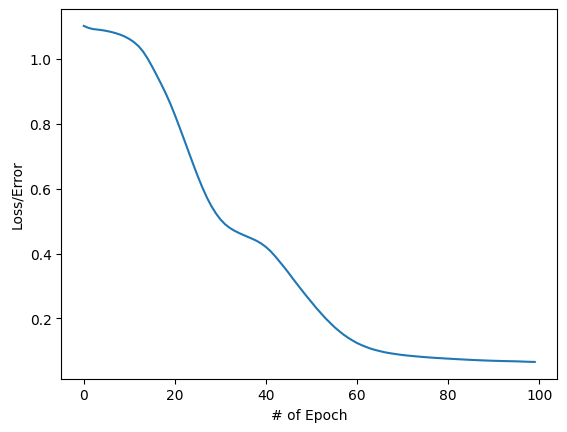

In [88]:
#Graphing the losses
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('# of Epoch')


In [94]:
#Evaluating model using Testing dataset
with torch.no_grad():   #Turning off Back Propagation
    y_eval = model.forward(X_test) #Testing Input dataset
    loss = criterion(y_eval, y_test) # We are comparing the predictions and the real answers

In [95]:
loss    #This number should have been close to the error score of the training data

tensor(0.0168)

In [111]:
# We are checking how many did it get correct since or testing data is 20% and out of 150 is 30
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        # Converting string back to flower name
        # if y_test[i] == 0:
        #     x = 'Setosa'
        # elif y_test[i] == 1:
        #     x = 'Versicolor'
        # else:
        #     x = 'Virginica'
            
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')       # This will let us know what type of flower is it 
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\t \t # of Correctly Classified Flower:{correct}')

1.) tensor([-11.4115,  -0.1238,   8.3215]) 	 2 	 2
2.) tensor([-2.2726,  5.9755, -3.0512]) 	 1 	 1
3.) tensor([ 15.2875,   4.1884, -20.7106]) 	 0 	 0
4.) tensor([-12.0826,   0.7893,   8.4512]) 	 2 	 2
5.) tensor([ 12.7916,   3.7238, -17.5490]) 	 0 	 0
6.) tensor([-12.9586,  -0.4041,   9.6180]) 	 2 	 2
7.) tensor([ 13.1343,   3.7698, -17.9746]) 	 0 	 0
8.) tensor([-3.8514,  5.9321, -1.7754]) 	 1 	 1
9.) tensor([-4.3847,  5.4674, -1.0091]) 	 1 	 1
10.) tensor([-2.1206,  6.3927, -3.5247]) 	 1 	 1
11.) tensor([-10.5020,   1.0412,   7.0605]) 	 2 	 2
12.) tensor([-3.3532,  6.1463, -2.3229]) 	 1 	 1
13.) tensor([-4.6562,  4.9838, -0.4328]) 	 1 	 1
14.) tensor([-4.6148,  5.0894, -0.5466]) 	 1 	 1
15.) tensor([-5.3495,  4.5222,  0.4491]) 	 1 	 1
16.) tensor([ 12.3089,   3.6327, -16.9372]) 	 0 	 0
17.) tensor([-5.0919,  4.5707,  0.2128]) 	 1 	 1
18.) tensor([-5.1652,  4.1421,  0.5979]) 	 1 	 1
19.) tensor([ 11.6782,   3.5042, -16.1327]) 	 0 	 0
20.) tensor([ 14.2799,   3.9900, -19.4289]) 	 0 	 0

In [116]:
#Adding new data points
new_iris = torch.tensor([5.2, 2.8, .9, 0.1])
with torch.no_grad():
    print(model(new_iris))      #The column is the flower type and the position of the largest number is the flower that is assoicated with the new data point

tensor([ 13.4032,   3.7905, -18.3020])


In [114]:
#Saving the Neural Network
torch.save(model.state_dict(), 'iris_classifier_model.pt')

In [117]:
#Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_classifier_model.pt'))

<All keys matched successfully>

In [118]:
#Making sure it loaded correcly by looking at the initalized layers
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=3, bias=True)
)